In [1]:
import time
t1 = time.time()

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix
import h5py
import matplotlib.pyplot as plt

In [2]:
##### load data #####

data_path = '/data/Chen-Wang/data_HLfeature.h5'
data_file = h5py.File(data_path, 'r')
data_file.keys()

test_path = '/data/Chen-Wang/test_data_HLfeature.h5'
test_file = h5py.File(test_path, 'r')
data_file.keys()

<KeysViewHDF5 ['H_0', 'H_1', 'J1_tau21', 'J2_tau21', 'LB_1', 'SS_0', 'SS_1', 'X_HH', 'deta_JJ', 'iht', 'm_J1', 'm_J2', 'm_JJ', 'target2', 'target3']>

In [3]:
##### scratch data #####

features_tradition = ['X_HH', 'iht', 'm_JJ', 'm_J1', 'm_J2', 'deta_JJ', 'J1_tau21', 'J2_tau21']
features_TDA = ['X_HH', 'iht', 'm_JJ', 'm_J1', 'm_J2', 'deta_JJ', 'J1_tau21', 'J2_tau21', 'H_0', 'H_1', 'SS_0', 'SS_1', 'LB_1']

target_2 = ['signal', 'background']
target_3 = ['signal', 'ttbarBG', 'jjBG']
                
train_data = []
for feature in features_tradition:
    train_data.append(data_file[feature][:])
train_data = np.array(train_data).T
train_target = data_file['target2'][:]

test_data = []
for feature in features_tradition:
    test_data.append(test_file[feature][:])
test_data = np.array(test_data).T
test_target = test_file['target2'][:]

print("shape of training data:", np.shape(train_data))
print("shape of training target:", np.shape(train_target))

print("shape of testing data:", np.shape(test_data))
print("shape of testing target:", np.shape(test_target))

shape of training data: (1289549, 8)
shape of training target: (1289549,)
shape of testing data: (153977, 8)
shape of testing target: (153977,)


In [4]:
##### fit decision tree #####

model_tree = tree.DecisionTreeClassifier(max_depth=12)
model_tree.fit(train_data, train_target)

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=1000)
# tree.plot_tree(model_tree, feature_names=features_tradition, class_names=target_2, filled=True)

print("Training score: ", model_tree.score(train_data, train_target))

Training score:  0.7763784082652152


In [5]:
##### plot the training confusion matrix #####

target_pred = model_tree.predict(train_data)
print("The confusion matrix is:")
print(confusion_matrix(train_target, target_pred))

The confusion matrix is:
[[301447 168616]
 [119755 699731]]


In [6]:
##### plot the testing confusion matrix #####

print("Testing score: ", model_tree.score(test_data, test_target))

predtion = model_tree.predict(test_data)
print("The confusion matrix is:")
print(confusion_matrix(test_target, predtion))

Testing score:  0.7028192522259818
The confusion matrix is:
[[66931 35948]
 [ 9811 41287]]


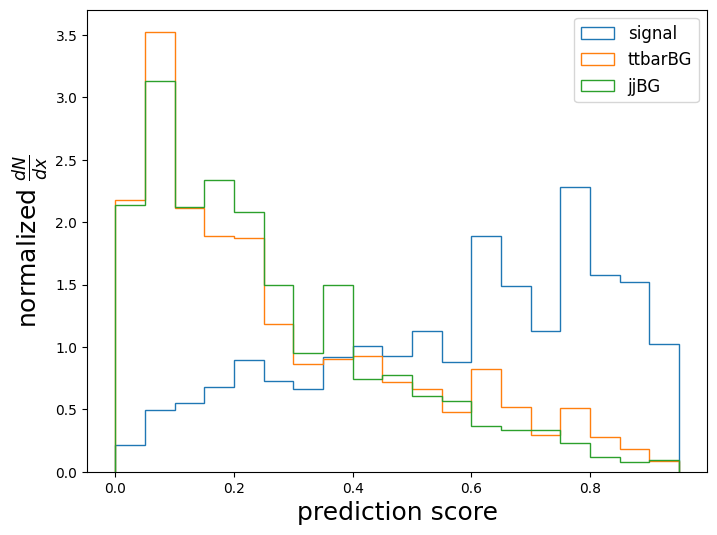

In [7]:
##### make prediction probability #####

prediction_probability = model_tree.predict_proba(test_data)

##### without tda prediction #####

sig_predict = prediction_probability[0:102879, 0]
ttbarBG_predict = prediction_probability[102879:102879+50065, 0]
jjBG_predict = prediction_probability[102879+50065:, 0]

plt.figure(1, figsize=(8,6))
bins = np.arange(0,1,0.05)
plt.hist(sig_predict, histtype='step', bins=bins, label='signal', density=True)
plt.hist(ttbarBG_predict, histtype='step', bins=bins, label='ttbarBG', density=True)
plt.hist(jjBG_predict, histtype='step', bins=bins, label='jjBG', density=True)
plt.xlabel(r"prediction score", fontsize=18)
plt.ylabel(r"normalized $\frac{dN}{dx}$", fontsize=18)
plt.legend(loc='best', fontsize=12)
plt.show()

In [8]:
##### scatch data with TDA #####

tda_train_data = []
for feature in features_TDA:
    tda_train_data.append(data_file[feature][:])
tda_train_data = np.array(tda_train_data).T
train_target = data_file['target2'][:]

tda_test_data = []
for feature in features_TDA:
    tda_test_data.append(test_file[feature][:])
tda_test_data = np.array(tda_test_data).T
test_target = test_file['target2'][:]

print("shape of training data:", np.shape(tda_train_data))
print("shape of training target:", np.shape(train_target))

print("shape of testing data:", np.shape(tda_test_data))
print("shape of testing target:", np.shape(test_target))

shape of training data: (1289549, 13)
shape of training target: (1289549,)
shape of testing data: (153977, 13)
shape of testing target: (153977,)


In [9]:
##### fit decision tree #####

tda_model_tree = tree.DecisionTreeClassifier(max_depth=12)
tda_model_tree.fit(tda_train_data, train_target)

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=1000)
# tree.plot_tree(model_tree, feature_names=features_tradition, class_names=target_2, filled=True)

print("Training score: ", tda_model_tree.score(tda_train_data, train_target))

Training score:  0.7802906287391949


In [10]:
##### plot the training confusion matrix #####

tda_target_pred = tda_model_tree.predict(tda_train_data)
print("The confusion matrix is:")
print(confusion_matrix(train_target, tda_target_pred))

The confusion matrix is:
[[300259 169804]
 [113522 705964]]


In [11]:
##### plot the testing confusion matrix #####

print("Testing score: ", tda_model_tree.score(tda_test_data, test_target))

predtion = tda_model_tree.predict(tda_test_data)
print("The confusion matrix is:")
print(confusion_matrix(test_target, predtion))

Testing score:  0.7000331218298836
The confusion matrix is:
[[66232 36647]
 [ 9541 41557]]


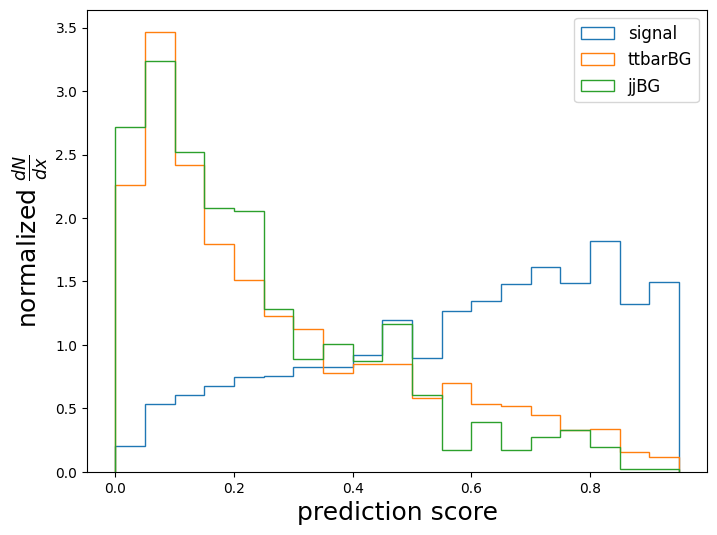

In [12]:
##### make prediction probability #####

tda_prediction_probability = tda_model_tree.predict_proba(tda_test_data)

##### with tda prediction #####

sig_predict_tda = tda_prediction_probability[0:102879, 0]
ttbarBG_predict_tda = tda_prediction_probability[102879:102879+50065, 0]
jjBG_predict_tda = tda_prediction_probability[102879+50065:, 0]

plt.figure(1, figsize=(8,6))
bins = np.arange(0,1,0.05)
plt.hist(sig_predict_tda, histtype='step', bins=bins, label='signal', density=True)
plt.hist(ttbarBG_predict_tda, histtype='step', bins=bins, label='ttbarBG', density=True)
plt.hist(jjBG_predict_tda, histtype='step', bins=bins, label='jjBG', density=True)
plt.xlabel(r"prediction score", fontsize=18)
plt.ylabel(r"normalized $\frac{dN}{dx}$", fontsize=18)
plt.legend(loc='best', fontsize=12)
plt.show()

In [16]:
##### calculate significance in Luminosity = 3000(fb^-1) #####

score_cut = 0.85
Luminosity = 3000    ### unit:fb^-1

N_sim_sig = 200000
N_sim_ttbarBG = 200000
N_sim_jjBG = 200000

Xsection_sig = 1.1086583
print("Before selection, the cross section of signal:", Xsection_sig, "(fb)")
Xsection_ttbarBG = 34166.61
print("Before selection, the cross section of ttbarBG:", Xsection_ttbarBG, "(fb)")
Xsection_jjBG = 60561410.45
print("Before selection, the cross section of jjBG:", Xsection_jjBG, "(fb)")

##### without tda #####

print("\n########## Without TDA ##########")

N_select_sig = len(sig_predict[np.where(sig_predict>score_cut)])
print(N_select_sig, "signal event pass decision tree score", score_cut, ", selection rate:", N_select_sig/len(sig_predict))
N_select_ttbarBG = len(ttbarBG_predict[np.where(ttbarBG_predict>score_cut)])
print(N_select_ttbarBG, "ttbarBG event pass decision tree score", score_cut, ", selection rate:", N_select_ttbarBG/len(ttbarBG_predict))
N_select_jjBG = len(jjBG_predict[np.where(jjBG_predict>score_cut)])
print(N_select_jjBG, "jjBG event pass decision tree score", score_cut, ", selection rate:", N_select_jjBG/len(jjBG_predict))

s = Xsection_sig * (N_select_sig/N_sim_sig) * Luminosity
b = Xsection_ttbarBG * (N_select_ttbarBG/N_sim_ttbarBG) * Luminosity + Xsection_jjBG * (N_select_jjBG/N_sim_jjBG) * Luminosity
significance = np.sqrt(2*((s+b)*np.log(1+s/b)-s))
print("significance:", significance, "\n")

##### with tda #####

print("\n########## With TDA ##########")

TDA_select_sig = len(sig_predict_tda[np.where(sig_predict_tda>score_cut)])
print(TDA_select_sig, "signal event pass decision tree score", score_cut, ", selection rate:", TDA_select_sig/len(sig_predict))
TDA_select_ttbarBG = len(ttbarBG_predict_tda[np.where(ttbarBG_predict_tda>score_cut)])
print(TDA_select_ttbarBG, "ttbarBG event pass decision tree score", score_cut, ", selection rate:", TDA_select_ttbarBG/len(ttbarBG_predict))
TDA_select_jjBG = len(jjBG_predict_tda[np.where(jjBG_predict_tda>score_cut)])
print(TDA_select_jjBG, "jjBG event pass decision tree score", score_cut, ", selection rate:", TDA_select_jjBG/len(jjBG_predict))

s = Xsection_sig * (TDA_select_sig/N_sim_sig) * Luminosity
b = Xsection_ttbarBG * (TDA_select_ttbarBG/N_sim_ttbarBG) * Luminosity + Xsection_jjBG * (TDA_select_jjBG/N_sim_jjBG) * Luminosity
significance = np.sqrt(2*((s+b)*np.log(1+s/b)-s))
print("significance:", significance, "\n")

Before selection, the cross section of signal: 1.1086583 (fb)
Before selection, the cross section of ttbarBG: 34166.61 (fb)
Before selection, the cross section of jjBG: 60561410.45 (fb)

########## Without TDA ##########
14361 signal event pass decision tree score 0.85 , selection rate: 0.13959117020966377
764 ttbarBG event pass decision tree score 0.85 , selection rate: 0.015260161789673425
14 jjBG event pass decision tree score 0.85 , selection rate: 0.013552758954501452
significance: 0.06595994835198596 


########## With TDA ##########
16386 signal event pass decision tree score 0.85 , selection rate: 0.15927448750473858
808 ttbarBG event pass decision tree score 0.85 , selection rate: 0.016139019274942573
4 jjBG event pass decision tree score 0.85 , selection rate: 0.003872216844143272
significance: 0.1354404504752082 

